# An Analysis of Airbnb Location Popularity - Group ID: 31


 Group Members:
*   Emre Demirci, 26531
*   Mehmet Enes Battal, 26354




## **Introduction**

> This project aims to find the popularity of a  listing location and try to figure out why it is that popular while utilizing a small section of this data which contains the hosts and listings in New York City. Solution to this question will involve analyzing various datasets which are crucial in the process while providing correlations with the help of visualization and statistical techniques.

> We start by implementing additional datasets to support our future findings and pre-processing our data to get a clean result. We proceed by creating graphs and visualizations in order to understand the dynamics of our dataframe. These visualizations and graphs provides information about the distrubiton of the number of reviews. Moreover, by utilizing the price range of different listings we obtained a relation between the number of reviews. Additionally, we compared the top 750 places with highest number of reviews. Then we created a color map that shows us reviews per month for each spesific locations. Therefore it made it possible to observe extremely popular cases.



### Problem Definition

Our initial hypothesis is that airbnb location popularity changes with the price and the borough of a listing. We assumed that a place is popular if it has more reviews. Our end goal is to verify our hypothesis and train some machine learning algorithms by using different machine learning techniques. For each technique, we will use two models to compare their accuracy in relation with their hyperparameters.


### Utilized Datasets



*   Bus Stop Data: fname1 = "Bus_Stop_Shelter.csv" stored as dataframe df1

*   WiFi Hotspot Data: fname2 = "NYC_Wi-Fi_Hotspot_Locations.csv" stored as dataframe df2

*   Airbnb data: fname = "AB_NYC_2019.csv" stored as dataframe df





In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import HeatMap
import pandas as pd
import pandas_profiling 
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
import urllib
import folium
from scipy import stats
from scipy import special
from folium.plugins import HeatMap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive/"

Mounted at /content/drive


#### Bus Stop Shelters

https://data.cityofnewyork.us/Transportation/Bus-Stop-Shelters/qafz-7myz

This dataset contains the location of Bus Stop Shelters. Taken from NYC open Data

In [0]:
fname1 = "Bus_Stop_Shelter.csv"
df1 = pd.read_csv(join(path_prefix, fname1))

df1.head()

,CounDist,BoroCD,AssemDist,the_geom,CongDist,StSenDist,SHELTER_ID,LOCATION,AT_BETWEEN,LONGITUDE,LATITUDE,AssetID,BoroCode,BoroName,Street,SegmentID,PhysicalID,NODEID
0,34,301,53,POINT (-73.94783099999995 40.70681200000007),7,18,BR0003,MONTROSE AV,LORIMER ST,-73.947831,40.706812,1,3,Brooklyn,MONTROSE AVENUE,31244.0,91546,0
1,34,301,50,POINT (-73.94516199999998 40.71909700000003),12,18,BR0014,GRAHAM AV,HERBERT ST,-73.945162,40.719097,2,3,Brooklyn,GRAHAM AVENUE,35598.0,45754,0
2,34,301,53,POINT (-73.94578299999995 40.702976000000035),7,18,BR0026,BROADWAY,LEONARD ST,-73.945783,40.702976,3,3,Brooklyn,BROADWAY,31350.0,43972,19920
3,34,301,50,POINT (-73.94083599999993 40.72019500000005),12,18,BR0028,KINGSLAND AV,HERBERT ST,-73.940836,40.720195,4,3,Brooklyn,KINGSLAND AVENUE,65844.0,48893,40551
4,35,302,50,POINT (-73.96979499999998 40.69344000000007),8,25,BR0040,VANDERBILT AV,MYRTLE AV,-73.969795,40.693440,5,3,Brooklyn,VANDERBILT AVENUE,30196.0,60512,0


In [0]:
df1.BoroName.unique()

array(['Brooklyn', 'Queens', 'Bronx', 'Manhattan', 'Staten Island'],
      dtype=object)

**Pre-Process**

In [0]:
df1 = df1.dropna()
df1.isnull().sum()


CounDist      0
BoroCD        0
AssemDist     0
the_geom      0
CongDist      0
StSenDist     0
SHELTER_ID    0
LOCATION      0
AT_BETWEEN    0
LONGITUDE     0
LATITUDE      0
AssetID       0
BoroCode      0
BoroName      0
Street        0
SegmentID     0
PhysicalID    0
NODEID        0
dtype: int64

**Data Insight**

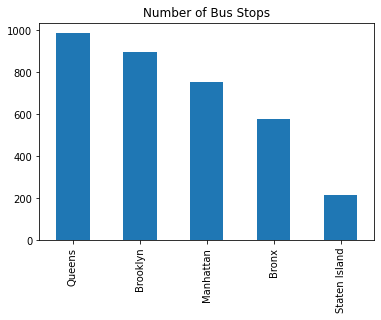

In [0]:
df1_BoroDist = df1.BoroName.value_counts()

df1_BoroDist.plot(kind="bar", title = "Number of Bus Stops")

plt.show()

In [0]:
lat = df1["LATITUDE"].mean()
lng = df1["LONGITUDE"].mean()

busMap = folium.Map(location=[lat, lng], zoom_start=12, tiles = "Stamen Terrain")

locs = df1[["LATITUDE", "LONGITUDE"]].values

for i in locs:
  folium.CircleMarker(location=i, radius=3, color="black").add_to(busMap)

busMap

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# heatmap

lat = df1["LATITUDE"].mean()
lng = df1["LONGITUDE"].mean()

busBaseMap = folium.Map(location=[lat, lng], zoom_start=12, tiles = "Stamen Terrain")

HeatMap(data = df1[["LATITUDE", "LONGITUDE"]].groupby(["LATITUDE", "LONGITUDE"]).sum().reset_index().values.tolist(), radius = 8, max_zoom = 13).add_to(busBaseMap)

busBaseMap

#### WIFI Hotspot Locations

https://www.kaggle.com/new-york-city/nyc-public-wifi

The dataset consists of records for every public WiFi hotspot (ones provided by or in partnership with the city) in New York City. It contains over 2500 records overall.

This dataset was published as-is by the New York City Department of Information Technology & Telecommunications.

In [0]:
fname2 = "NYC_Wi-Fi_Hotspot_Locations.csv"
df2 = pd.read_csv(join(path_prefix, fname2))

df2.head()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,Location_T,Remarks,City,SSID,SourceID,Activated,BoroCode,BoroName,NTACode,NTAName,CounDist,Postcode,BoroCD,CT2010,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,8641,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-25 41 AVENUE,40.755727,-73.944583,999603.226171,214613.274563,Indoor AP - Community Center - Computer Rm,Free - Up to 25 mbs Wi-Fi Service,Queens,Quensbridge Connected,NYC HOUSING AUTHORITY,2018-05-01T00:00:00,4,Queens,QN68,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4746,"{'longitude': '-73.944583', 'human_address': '..."
1,8642,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-43 41 AVENUE,40.755333,-73.944131,999728.543834,214469.807003,Indoor AP - Queens Public Library,Free - Up to 25 mbs Wi-Fi Service,Queens,Quensbridge Connected,NYC HOUSING AUTHORITY,2018-05-01T00:00:00,4,Queens,QN68,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4747,"{'longitude': '-73.944131', 'human_address': '..."
2,8643,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-05 41 AVENUE,40.755751,-73.945166,999441.701232,214621.916935,Indoor AP - North Management Office,Free - Up to 25 mbs Wi-Fi Service,Queens,Quensbridge Connected,NYC HOUSING AUTHORITY,2018-05-01T00:00:00,4,Queens,QN68,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4748,"{'longitude': '-73.945166', 'human_address': '..."
3,8644,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-05 41 AVENUE,40.755751,-73.945166,999441.701232,214621.916935,Indoor AP - North Management Office,Free - Up to 25 mbs Wi-Fi Service,Queens,Quensbridge Connected,NYC HOUSING AUTHORITY,2018-05-01T00:00:00,4,Queens,QN68,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4749,"{'longitude': '-73.945166', 'human_address': '..."
4,8645,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-05 41 AVENUE,40.755751,-73.945166,999441.701232,214621.916935,Indoor AP - North Maintenance Area,Free - Up to 25 mbs Wi-Fi Service,Queens,Quensbridge Connected,NYC HOUSING AUTHORITY,2018-05-01T00:00:00,4,Queens,QN68,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4750,"{'longitude': '-73.945166', 'human_address': '..."


In [0]:
df2["Activated"] = pd.to_datetime(df2["Activated"], errors = "coerce")
# If there are some wrong formatted data, we set them to null by the statement errors = "coerce"

df2.dtypes

OBJECTID                         int64
Borough                         object
Type                            object
Provider                        object
Name                            object
Location                        object
Latitude                       float64
Longitude                      float64
X                              float64
Y                              float64
Location_T                      object
Remarks                         object
City                            object
SSID                            object
SourceID                        object
Activated               datetime64[ns]
BoroCode                         int64
BoroName                        object
NTACode                         object
NTAName                         object
CounDist                       float64
Postcode                         int64
BoroCD                         float64
CT2010                         float64
BCTCB2010                      float64
BIN                      

In [0]:
# We wont drop all the NaN values to not loose a large portion of our data. 
# Dropping rows that the only NAN value is Remarks should suffice since the other columns
# are not that important to us.

df2 = df2.dropna(subset=["Remarks"])

df2.isnull().sum()

OBJECTID                   0
Borough                    0
Type                       0
Provider                   0
Name                       0
Location                   0
Latitude                   0
Longitude                  0
X                          0
Y                          0
Location_T                 0
Remarks                    0
City                       0
SSID                       0
SourceID                 518
Activated               1144
BoroCode                   0
BoroName                   0
NTACode                    0
NTAName                    0
CounDist                   0
Postcode                   0
BoroCD                     0
CT2010                     0
BCTCB2010                  0
BIN                        0
BBL                        0
DOITT_ID                   0
Location (Lat, Long)       0
dtype: int64

In [0]:
df2 = df2.drop(columns = "Location (Lat, Long)")
df2.head(2)

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,Location_T,Remarks,City,SSID,SourceID,Activated,BoroCode,BoroName,NTACode,NTAName,CounDist,Postcode,BoroCD,CT2010,BCTCB2010,BIN,BBL,DOITT_ID
0,8641,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-25 41 AVENUE,40.755727,-73.944583,999603.226171,214613.274563,Indoor AP - Community Center - Computer Rm,Free - Up to 25 mbs Wi-Fi Service,Queens,Quensbridge Connected,NYC HOUSING AUTHORITY,2018-05-01,4,Queens,QN68,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4746
1,8642,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-43 41 AVENUE,40.755333,-73.944131,999728.543834,214469.807003,Indoor AP - Queens Public Library,Free - Up to 25 mbs Wi-Fi Service,Queens,Quensbridge Connected,NYC HOUSING AUTHORITY,2018-05-01,4,Queens,QN68,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4747


In [0]:
df2.describe()

,OBJECTID,Latitude,Longitude,X,Y,BoroCode,CounDist,Postcode,BoroCD,CT2010,BCTCB2010,BIN,BBL,DOITT_ID
count,2634.000000,2634.000000,2634.000000,2.634000e+03,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2.634000e+03,2.634000e+03,2.634000e+03,2634.000000
mean,5581.239180,40.743015,-73.948734,9.984523e+05,209987.426240,2.105163,16.769172,10498.086560,217.756264,1712.489370,2.127873e+06,1.486345e+06,1.682425e+09,3001.646925
std,2989.153356,0.066953,0.061578,1.707414e+04,24390.530638,1.284437,14.814458,765.845528,129.910831,10173.053914,1.294601e+06,1.417697e+06,1.411532e+09,1378.946060
min,1.000000,40.517045,-74.190996,9.311454e+05,127707.548113,1.000000,1.000000,83.000000,101.000000,1.000000,1.000500e+06,0.000000e+00,0.000000e+00,3.000000
25%,2167.250000,40.703502,-73.984340,9.885883e+05,195630.148159,1.000000,4.000000,10022.000000,106.000000,83.000000,1.011500e+06,0.000000e+00,1.007452e+09,1571.250000
50%,7188.500000,40.747765,-73.960502,9.951996e+05,211719.034453,1.000000,9.000000,10065.000000,112.000000,161.000000,1.025700e+06,1.048768e+06,1.015145e+09,3466.500000
75%,7846.750000,40.789133,-73.923879,1.005332e+06,226780.889172,3.000000,29.000000,11214.000000,311.000000,269.000000,3.051500e+06,2.102416e+06,3.011840e+09,4124.750000
max,8986.000000,40.894246,-73.734311,1.057876e+06,265092.924588,5.000000,51.000000,11694.000000,595.000000,117201.000000,5.027302e+06,5.158060e+06,5.065960e+09,4783.000000


**First, lets see the number of hotspot locations in each Borough**

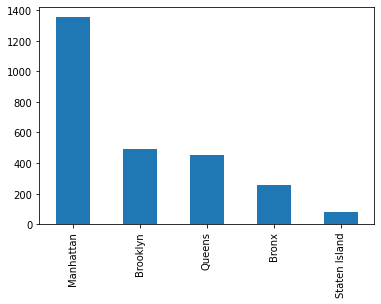

In [0]:
df2['BoroName'].value_counts().plot.bar()

plt.show()

**Now to see the service type (free or not) we plot a pie chart**

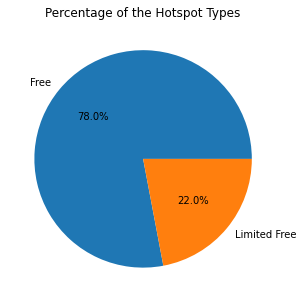

In [0]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
ax = df2.groupby(by = "Type").size().plot(ax = axes, kind= "pie", title = "Percentage of the Hotspot Types", autopct='%1.1f%%', label="")
plt.show()

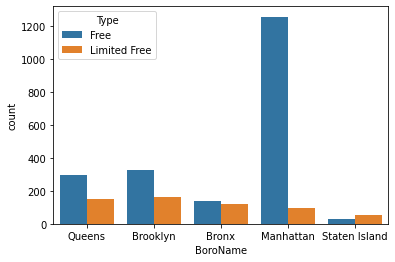

In [0]:
ax = sns.countplot(x="BoroName",hue = "Type" ,data=df2)

In [0]:
lat = df2["Latitude"].mean()
lng = df2["Longitude"].mean()

wifiBaseMap = folium.Map(location=[lat, lng], zoom_start=12, tiles = "cartodbdark_matter")

HeatMap(data = df2[["Latitude", "Longitude"]].groupby(["Latitude", "Longitude"]).sum().reset_index().values.tolist(), radius = 8, max_zoom = 13).add_to(wifiBaseMap)

wifiBaseMap

#### Airbnb 

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

In [0]:
fname = "AB_NYC_2019.csv"
df = pd.read_csv(join(path_prefix, fname))

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Description of the data briefly

In [0]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [0]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [0]:
#checking amount of rows in given dataset to understand the size of the dataset
len(df)

48895

**Pre-Processing**

In [0]:
# drop Nan values in all of the columns
df.drop(columns=['id', 'host_id','host_name'],inplace = True)
df.dropna(inplace = True)
len(df)

38837

**Detecting and Deleting Outliers**

Here we choose a really high range(5 std deviations) so there is a really high chance that data outside of these limits almost certainly is an outlier.
We did not choose %95 percent here because, in this project we are interested in extreme cases as well in order to discover interesting events.
Therefore we want to prevent the data informationwise as much as possible, while getting rid of real outliers.


In [0]:
upper_lim = df['number_of_reviews'].quantile(.99)
lower_lim = df['number_of_reviews'].quantile(.01)
df = df[(df['number_of_reviews'] < upper_lim) & (df['number_of_reviews'] > lower_lim)]

# One might ask why we choose the column with total number of reviews rather than number_of_reviews per month
# It is because reviews per month is already avaraged(total/month) therefore, it should not get affected via outliers that much.

## Data Exploration

**Histograms For General DataFrame**

Lets create histograms of different kinds, by this way we are going to have good amount of information about data.


FOR GENERAL DATAFRAME


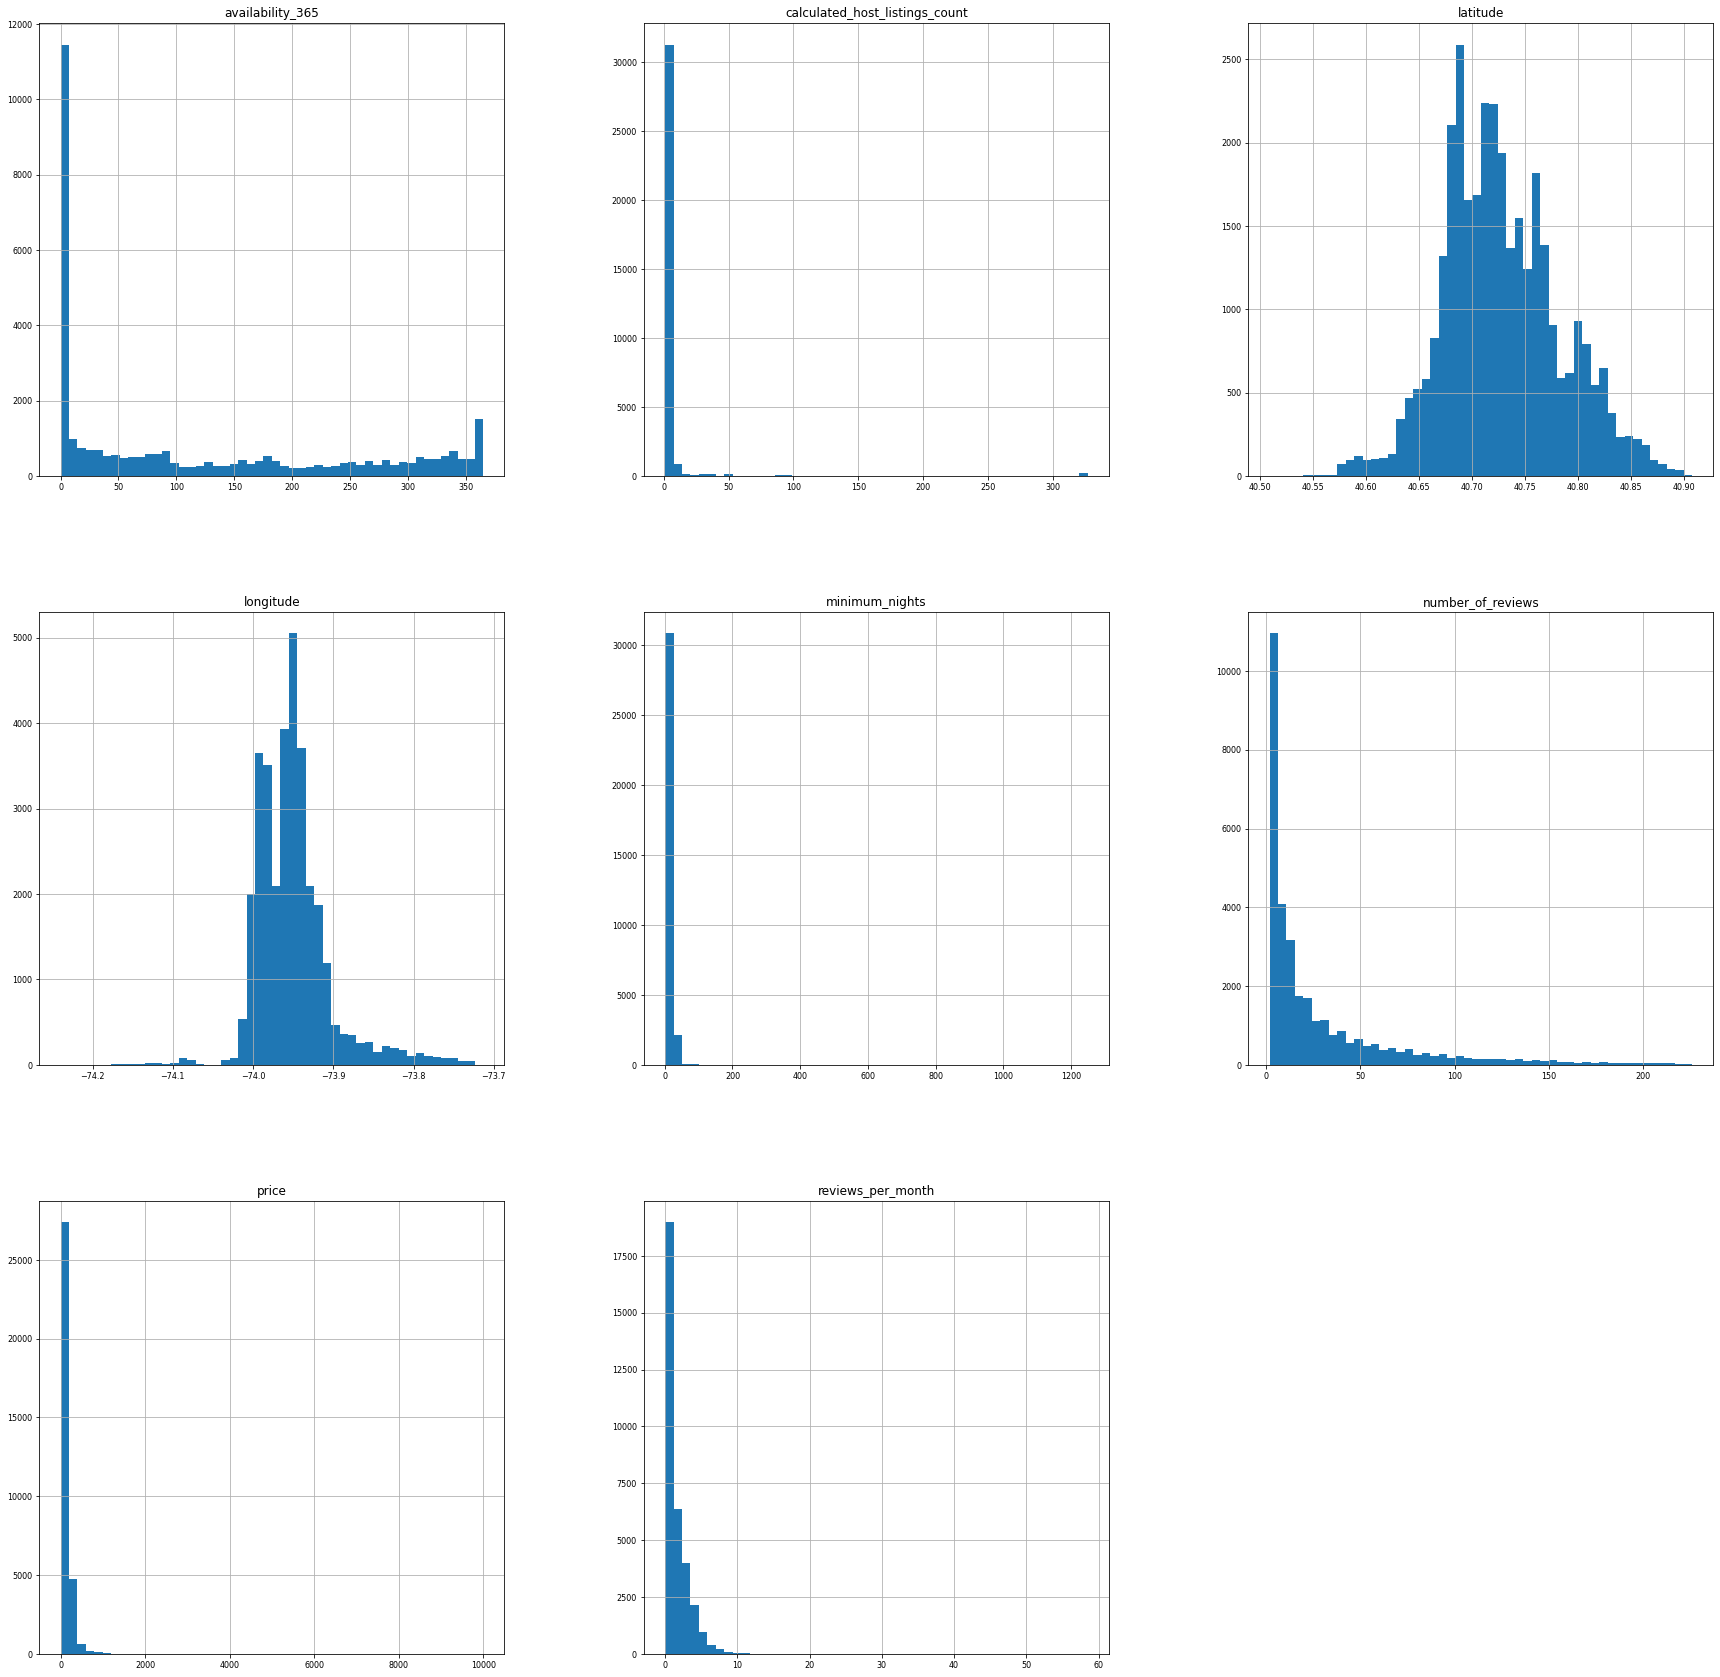

In [0]:
print("FOR GENERAL DATAFRAME")
df.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8)

plt.show()

**Correlation Matrix**

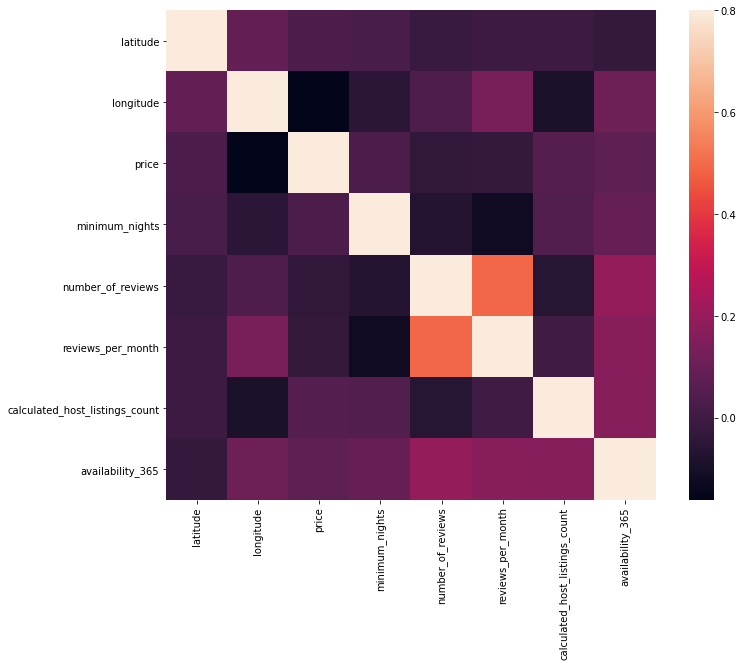

In [0]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()
# it can be seen that number of reviews are correlated with reviews/month, but that is something expected
# lets see what we can get by using those 2 columns

Binning for number of reviews per month

*   Check the characteristics of column
*   Define appropiate bins for data



Lets have a better understanding for the mean so we can have better graphs and understanding

In [0]:
mean_avg_review_count = df['reviews_per_month'].mean()
print('mean_avg_review_count ->', mean_avg_review_count)

mean_avg_review_count -> 1.5014474199475765


In [0]:
m1 = df['reviews_per_month'].mean()
print('mean',m1)
# std dev is around 1.7 so this bin interval and values should be enough just by heart
bins = [0,1.5,3,4.5,np.inf] # multiples of mean

reviews_permonth_count = ['0 - 1.5', '1.5 - 3', '3 - 4.5','4.5 - inf'] # More detail for above the average

df['category_reviews_permonth'] = pd.cut(df['reviews_per_month'], bins, labels=reviews_permonth_count)
df['category_reviews_permonth'].head(10)

mean 1.5014474199475765


0     0 - 1.5
1     0 - 1.5
4     0 - 1.5
5     0 - 1.5
6     0 - 1.5
8     0 - 1.5
9     0 - 1.5
10    0 - 1.5
11    0 - 1.5
12    0 - 1.5
Name: category_reviews_permonth, dtype: category
Categories (4, object): [0 - 1.5 < 1.5 - 3 < 3 - 4.5 < 4.5 - inf]

We can see that there is a considerable amount of locations which took 4.5 to more reviews per month and the ratio between low reviews and high reviews is also nice so we can dive into more detail.That binning process went well we can see it clearly the part we are interested in.

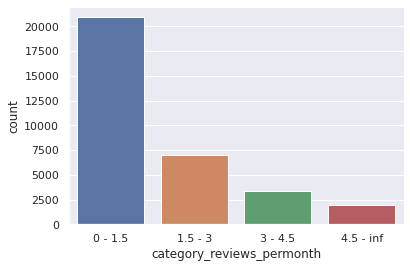

In [0]:
sns.set(style="darkgrid")
ax = sns.countplot(x="category_reviews_permonth", data=df)

**Creating a heatmap for places where monthly review is over 4.5 on avarage
( Highest reviews permonth according to Binned version )**

In [0]:
def generateBaseMap(default_location=[40.748900, -73.976048], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [0]:
colors = {'0 - 1.5' : 'blue','1.5 - 3' : 'orange', '3 - 4.5' : 'green', '4.5 - inf': 'red'}

df_modified =df[df['category_reviews_permonth'] == '4.5 - inf']

lat = df["latitude"].mean()
lng = df["longitude"].mean()

baseMap = folium.Map(location=[lat, lng], zoom_start=12, tiles = "Stamen Terrain")

HeatMap(data = df_modified[["latitude", "longitude"]].groupby(["latitude", "longitude"]).sum().reset_index().values.tolist(), radius = 8, max_zoom = 13).add_to(baseMap)

baseMap

Really similar to heatmap of bus station(in additional dataset) isn't it :)

**Binning for prices**

In [0]:
#Great now lets categorize the prices the same way so we can have a chance to compare their relationship
mean_prices = df['price'].mean() # = 141.52
print('mean of prices ->', mean_prices)

m2 = mean_prices

bins = [0,142,284,426,np.inf] # multiples of mean of prices,
# i choose this binning interval because i want to see whats under the avarage in less detail
# and whats above the avarage in more detail
reviews_permonth_count = ['0 - 142', '142 - 284', '284 - 426','426 - inf']
df['category_prices'] = pd.cut(df['price'], bins, labels=reviews_permonth_count)

df['category_prices'].head(10)


mean of prices -> 141.52275808054944


0     142 - 284
1     142 - 284
4       0 - 142
5     142 - 284
6       0 - 142
8       0 - 142
9     142 - 284
10      0 - 142
11      0 - 142
12      0 - 142
Name: category_prices, dtype: category
Categories (4, object): [0 - 142 < 142 - 284 < 284 - 426 < 426 - inf]

**Prices Divided Into Categories**


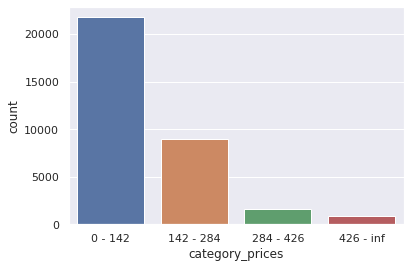

In [0]:
sns.set(style="darkgrid")
ax = sns.countplot(x="category_prices", data=df)
# Prices Divided Into Categories

**Finding Relations**

Relationship between Number of Reviews and Number of Reviews per Month for Places With Highest Number of Reviews

In [0]:
top_reviewed_listings=df.nlargest(120,'number_of_reviews')
top_reviewed_listings.head() # get a brief idea about the locations with highest reviews, just to visualize it

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category_reviews_permonth,category_prices
205,Sml Rm in pr Brst Park Sl great for Med/students,Brooklyn,Prospect Heights,40.67870,-73.97262,Private room,100,2,226,2019-06-06,2.12,3,250,1.5 - 3,0 - 142
2211,Apartment in the heart of Upper East Side,Manhattan,Upper East Side,40.77054,-73.95497,Entire home/apt,100,3,226,2019-07-01,2.97,1,221,1.5 - 3,0 - 142
2635,"Verna's Brownstone Suite (no stove, no gatheri...",Brooklyn,Bedford-Stuyvesant,40.68695,-73.92364,Entire home/apt,120,1,226,2019-07-04,3.22,2,274,3 - 4.5,0 - 142
3437,"❤️ 2 Beds Option + Private Bath, Sunshine Bush...",Brooklyn,Bushwick,40.69220,-73.92399,Private room,60,2,226,2019-06-30,3.42,2,164,3 - 4.5,0 - 142
10340,"Large, Bright NYC Room Near Trains",Brooklyn,Bushwick,40.69919,-73.93818,Private room,75,2,226,2019-06-10,4.78,2,128,4.5 - inf,0 - 142


Below we can see the top 750 listing locations.
If a building is 10 years old obviously it had a chance to get more reviews.
Therefore, it wouldn't be fair to compare with newer buildings with older ones.
If we want to see how other variables affect data (increases review). We need to consider this difference between using "number_of_reviews" or "reviews_per_month".

In [0]:
top_reviewed_listings=df.nlargest(750,'number_of_reviews') # Lets just take a look, parameter (750,'number_of_reviews') can change for different analysis
price_avrg=top_reviewed_listings.price.mean() # we might use this later
print('Average price per night: {}'.format(price_avrg))

Average price per night: 122.42933333333333


 **Compare Highly reviewed location**

 
First of all, all points in this graph has a high number of review at total.
Interesting thing is only a few of them has high reviews/month ratio. Red dots in this graph is the hot spots which keep getting high number reviews per month. This might be because of being really close to public transportation or something attractive.

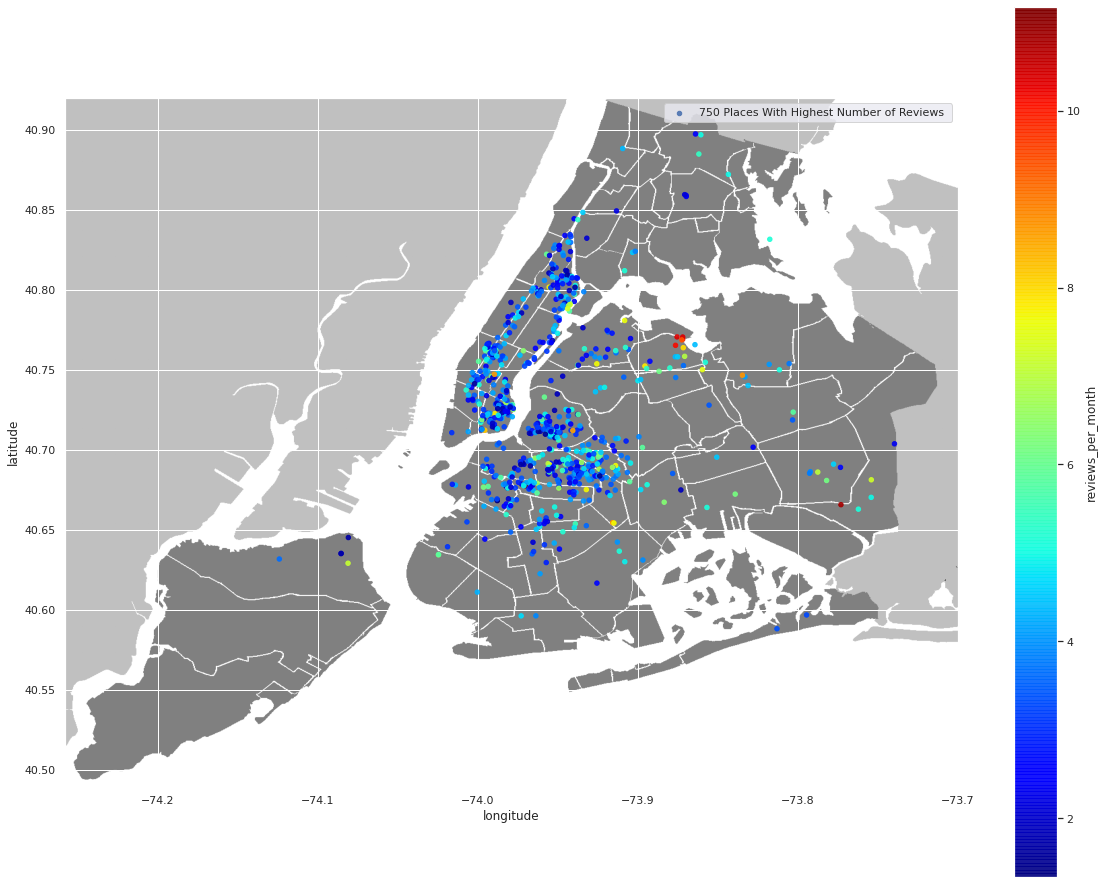

In [0]:
top_reviewed_listings=df.nlargest(750,'number_of_reviews') #first 750 locations, because it is large enough to avoid noise and small enough to not lose significance
#initializing the figure size
plt.figure(figsize=(20,16))
#loading the png NYC image found on google 
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(img)
#put the right coordinates to zoom in
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

top_reviewed_listings.plot(kind='scatter', x='longitude', y='latitude',
                           label='750 Places With Highest Number of Reviews ', c='reviews_per_month',
                           ax=ax, cmap=plt.get_cmap('jet'), colorbar=True,
                           alpha=0.9, zorder=5)
plt.legend()
plt.show()




> **When we take a look at that place (red dot, right in the upper middle of center) from google maps and from our heatmaps we see LaGuardia airport and a public Marina. Moreover, there are also considerable amounts of bus station there.  :)**




**We can also see a similar map for lowest number of reviews and their locations on map, and color for reviews_per_month**

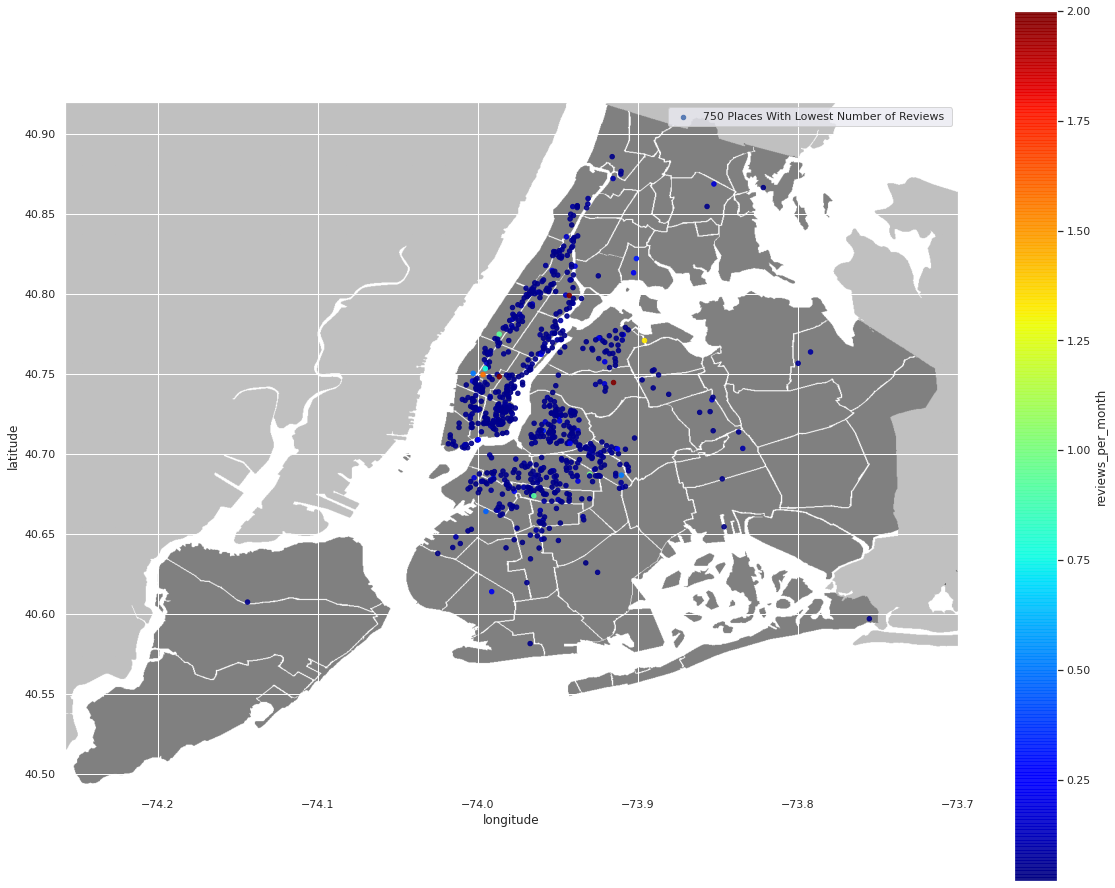

In [0]:
top_reviewed_listings=df.nsmallest(750,'number_of_reviews') #first 750 locations, because it is large enough to avoid noise and small enough to not lose significance
#initializing the figure size
plt.figure(figsize=(20,16))
#loading the png NYC image found on google 
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(img)
#put the right coordinates to zoom in
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

top_reviewed_listings.plot(kind='scatter', x='longitude', y='latitude',
                           label='750 Places With Lowest Number of Reviews ', c='reviews_per_month',
                           ax=ax, cmap=plt.get_cmap('jet'), colorbar=True,
                           alpha=0.9, zorder=5)
plt.legend()
plt.show()


**Number of Reviews for the listings with highest and lowest prices**

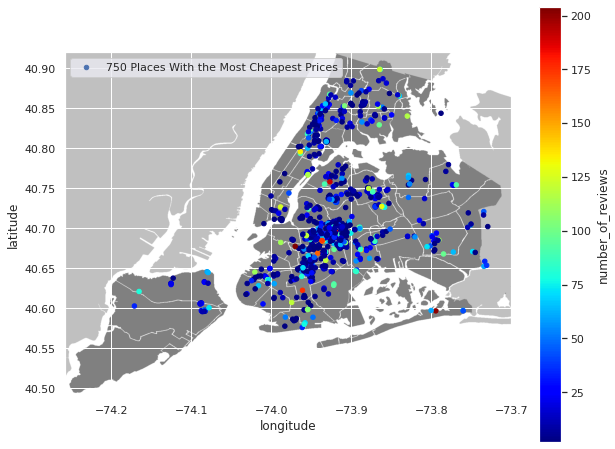

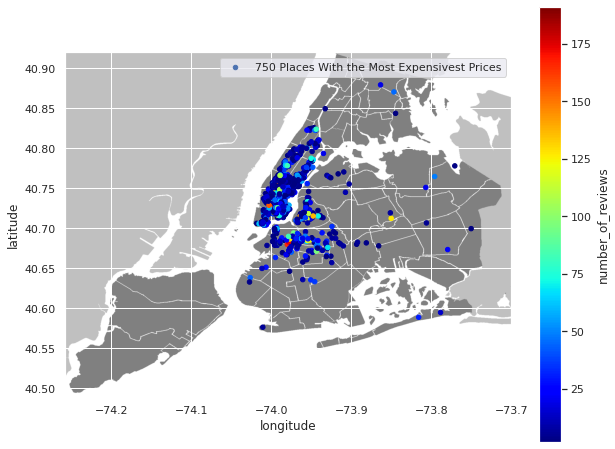

num_of_reviews for highest prices 16884
num_of_reviews for lowest prices 20078


In [0]:
# using same formula lets inspect our categories, most frequent reviews
smallest_prices_listings=df.nsmallest(750,'price') # we can see that 2500(even more) includes all (4.5-inf) category 
highest_prices_listings=df.nlargest(750,'price')

top_reviewed_listings
plt.figure(figsize=(10,8))
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(img)
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

smallest_prices_listings.plot(kind='scatter', x='longitude', y='latitude',
                           label='750 Places With the Most Cheapest Prices', c='number_of_reviews',
                           ax=ax, cmap=plt.get_cmap('jet'), colorbar=True,
                           alpha=1, zorder=1)
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

highest_prices_listings.plot(kind='scatter', x='longitude', y='latitude',
                           label='750 Places With the Most Expensivest Prices', c='number_of_reviews',
                           ax=ax, cmap=plt.get_cmap('jet'), colorbar=True,
                        alpha=1, zorder=1)
plt.legend()           
plt.show()            

print('num_of_reviews for highest prices',highest_prices_listings['number_of_reviews'].sum())
print('num_of_reviews for lowest prices', smallest_prices_listings['number_of_reviews'].sum())
# We can see from the result that cheaper ones are approximatley 1.5 times more likely
# to get reviews(1.33 exactly from result, for this interval), even though i choose the expensivest,
# and cheapest ones i took 120 samples from each
# so it should not be too far away from the real value.
# Lets also test if this ratio is statistically significant by applying 2 sample t-test

Above you can see two different graphs. First one shows the locations of the hostings with smallest prices and their number of reviews as color.
Second one shows the locations of the hostings with largest prices
and their number of reviews as color. By just looking visually we can see that
there is a visual difference between number of reviews they get. Cheaper ones,
tends to vary more in numbers_of_reviews.

**Two-Sample t-test**

Null Hypothesis: Observations above result purely from chance.

Alternative Hypothesis: Cheaper listing locations get more reviews than expensive ones.

In [0]:
expensive_locs =  highest_prices_listings['number_of_reviews']  
cheap_locs = smallest_prices_listings['number_of_reviews']
print(f"mean score of number_of_reviews in expensive_locs: {expensive_locs.mean():.2f}")
print(f"mean score of number_of_reviews in cheap_locs: {cheap_locs.mean():.2f}")

mean score of number_of_reviews in expensive_locs: 22.51
mean score of number_of_reviews in cheap_locs: 26.77


In [0]:
# Variances are not equal to each other
print("variance, expensive_locs: ",expensive_locs.var()) 
print("variance, cheap_locs: ",    cheap_locs.var()) # 

variance, expensive_locs:  921.8363044058742
variance, cheap_locs:  1321.6135576323966


In [0]:
stats.ttest_ind(cheap_locs, expensive_locs, equal_var=False)  # since variances are not equal to each other

Ttest_indResult(statistic=2.4623290909779434, pvalue=0.013919238472754426)

p-value is 0.01 < 0.05(significance level) so we can reject the null hypothesis, and say that this difference is statistically significant. It is the case that cheaper locations gets more reviews than expensive locations.

## Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

### Implementation

**Decision Tree**

For the algorithm with feature as price and label as category_reviews_permonth

In [0]:
# We have to map each category_reviews_permonth to a number to work with decision tree
df['category_reviews_permonth'] = df['category_reviews_permonth'].map({'0 - 1.5': 1, '1.5 - 3':2, "3 - 4.5" :3, "4.5 - inf" :4})

X = df[['price']]
y = df["category_reviews_permonth"]

# Split our data to 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

To show the differences between to models, we used hyperparameter tuning with 5-fold cross validation.

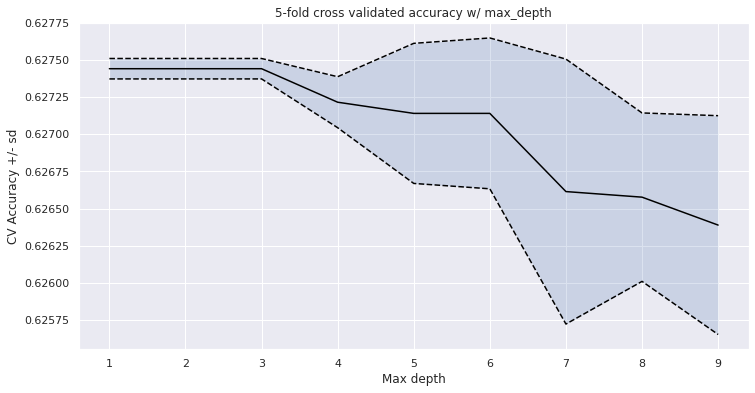

In [0]:
# Find the best parameter for max_depth using 5-fold CV and plot it.

accuracy_list = []
accuracy_SD_list = []

for depth in range (1, 10):
  model = tree.DecisionTreeClassifier(max_depth=depth)
  accuracies_CV = cross_val_score(model, X_train, y_train, cv=5)
  accuracy_list.append(accuracies_CV.mean())
  accuracy_SD_list.append(accuracies_CV.std())

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), accuracy_list, color='black', linestyle='solid')
plt.plot(range(1, 10), np.array(accuracy_list) + np.array(accuracy_SD_list),color='black', linestyle='dashed')
plt.plot(range(1, 10), np.array(accuracy_list) - np.array(accuracy_SD_list),color='black', linestyle='dashed' )
plt.fill_between(range(1, 10), np.array(accuracy_list) + np.array(accuracy_SD_list),
                 np.array(accuracy_list) - np.array(accuracy_SD_list), alpha=0.2, facecolor ='b')
plt.plot()
plt.title('5-fold cross validated accuracy w/ max_depth')  
plt.xlabel('Max depth')  
plt.ylabel('CV Accuracy +/- sd') 
plt.show()

In [0]:
# Creating to decision tree models with different hyperparameters

model1 = tree.DecisionTreeClassifier(min_samples_leaf = 1)
model2 = tree.DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 9)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

model1_trainPredictions = model1.predict(X_train)
model1_trainAcc = accuracy_score(y_train, model1_trainPredictions)

model2_trainPredictions = model2.predict(X_train)
model2_trainAcc = accuracy_score(y_train, model2_trainPredictions)

model1_testPredictions = model1.predict(X_test)
model1_testAcc = accuracy_score(y_test, model1_testPredictions)

model2_testPredictions = model2.predict(X_test)
model2_testAcc = accuracy_score(y_test, model2_testPredictions)

print("Model 1 : Decision Tree Accuracy on train data:" +str(model1_trainAcc))
print("Model 1 : Decision Tree Accuracy on test data:" +str(model1_testAcc))
print("Model 2 : Decision Tree Accuracy on train data:" +str(model2_trainAcc))
print("Model 2 : Decision Tree Accuracy on test data:" +str(model2_testAcc))

Model 1 : Decision Tree Accuracy on train data:0.6327521933953383
Model 1 : Decision Tree Accuracy on test data:0.6368975903614458
Model 2 : Decision Tree Accuracy on train data:0.62872312384682
Model 2 : Decision Tree Accuracy on test data:0.6370481927710844


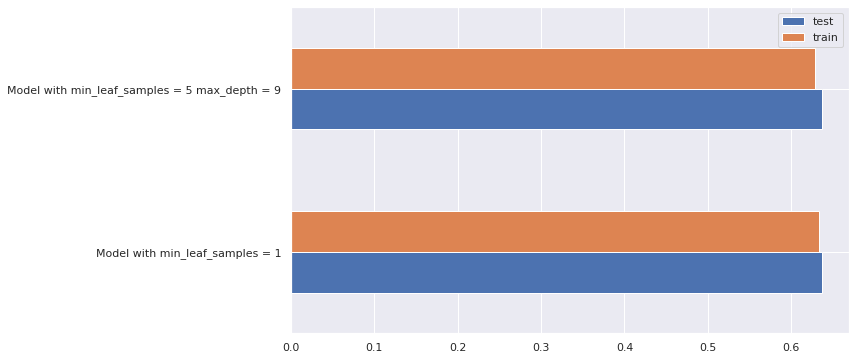

In [0]:
# To show both of the models' accuracy in a graph

test = [model1_testAcc, model2_testAcc]
train = [model1_trainAcc, model2_trainAcc]
index = ['Model with min_leaf_samples = 1', 'Model with min_leaf_samples = 5 max_depth = 9']
df_plot = pd.DataFrame({'test': test,'train': train}, index=index)
ax = df_plot.plot.barh(grid = True, figsize=(10, 6))

In [0]:
# Validating our accuracy results with 5-fold cross validation.
# And we can see that our results and CV results are really similar.

model1_accuracies = cross_val_score(model1, X, y, cv=5) 
model2_accuracies = cross_val_score(model2, X, y, cv=5)
print("Model 1 accuracies:", model1_accuracies)
print("Model 2 accuracies:", model2_accuracies)

print("Accuracy for Model 1: %0.2f (+/- %0.2f)" % (model1_accuracies.mean(), model1_accuracies.std() * 2))
print("Accuracy for Model 2: %0.2f (+/- %0.2f)" % (model2_accuracies.mean(), model2_accuracies.std() * 2))

Model 1 accuracies: [0.62545181 0.62635542 0.62795602 0.62464227 0.62735352]
Model 2 accuracies: [0.62771084 0.62725904 0.62795602 0.62840789 0.62976352]
Accuracy for Model 1: 0.63 (+/- 0.00)
Accuracy for Model 2: 0.63 (+/- 0.00)


**k-Nearest Neighbours**

For the algorithm with feature as borough(neighbourhood_group) and label as category_reviews_permonth

In [0]:
# We used one-hot encoding for neighbourhod_group to work with kNN machine learning algorithm.
# We used pandas default library encoding

df_encoded_neighbourhood = pd.get_dummies(df['neighbourhood_group'])
X = df_encoded_neighbourhood
y = df['category_reviews_permonth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

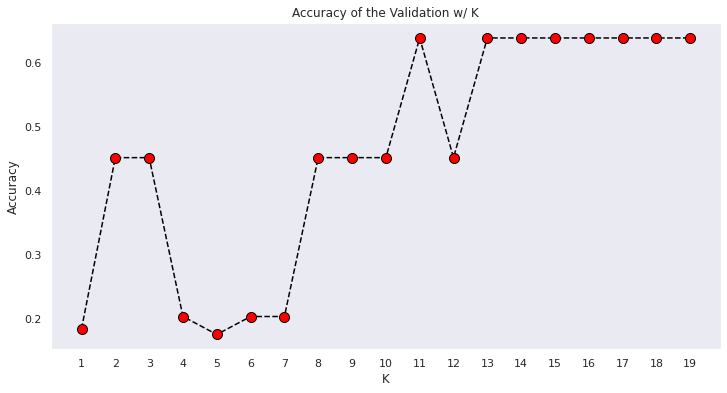

In [0]:
# Here, we used hyperparameter tuning for the hyperparameter k in kNN

K_range = np.arange(1, 20)
accuracy_list = []

for k in K_range:
  # create a new model with current K
  knn = KNeighborsClassifier(k, metric="euclidean")
  # fit training data
  knn.fit(X_train, y_train)
  # predict the validation data
  y_pred = knn.predict(X_test)
  # obtain the accuracy value
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

In [0]:
# create a new model with current K
k = 15

model = KNeighborsClassifier(k, metric="euclidean")
# fit training data
model.fit(X_train, y_train)
# predict the validation data
y_pred = model.predict(X_test)
# obtain the accuracy value
f"{accuracy_score(y_test, y_pred):.2f}"

'0.64'

### Results & Discussion

According to our data exploration, we found data that supports our initial hypothesis. Since the number of wifi hotspots and bus stops are different in each borough we used borough as a feature. We can see from the generated maps that more reviewed locations are near bus stop shelters or wifi hotspots (an extreme case is that there are more reviewed airbnbs near LaGuardia airport). When we compare scatter maps for bus stations and heat maps for wi-fi hotspots with our maps that show the number of reviews, we see that in Manhattan borough these features match with one another which also strengthens our analysis. From our scatter maps we observed that the cheapest places take a higher number of reviews when compared to most expensivest ones. We did a two-sided t-test to verify this observation.



Bus Stops 

<img height="200" width="400" src="https://drive.google.com/uc?id=1Gzw33X8sBg4nY17rG4inUcQQC8yKOnIn"/>  

WiFi Hotspots 

<img height="200" width="400" src="https://drive.google.com/uc?id=1jJGTmNhGOTgd4pETwLQcBuFhEXuJfP16"/>

Highest Reviewed Airbnbs

<img height="200" width="400" src="https://drive.google.com/uc?id=1lRfY6Wvd0Sc9FC1Fg_b9q2dKbXRP1bpb"/>


For machine learning, we used both kNN and decision tree techniques for different features. On top of that we used only one column of the dataset as our features of the machine learning algorithm. This enabled us to train the algorithm with only the column that we initially thought was affecting the popularity in our problem statement.

Our decision tree models show us that we can get accuracy up to 0.63 between prices and the number of reviews. The hyperparameters change the results slightly but the maximum difference we can get is about 0.002 when maxdepth is 9 according to hyperparameter tuning with 5-fold cross validation. Difference between the two models is negligible. Thus we can conclude that using different parameters doesn’t really affect the accuracy in our decision tree models. We verified our accuracy results by 5-fold cross validation and the results of it were pretty close.





<img height="300" width="600" src="https://drive.google.com/uc?id=1GR3lTgMo-xrAlvildqBBK2ug_gw31Qwr"/>

<img height="300" width="700" src="https://drive.google.com/uc?id=1WsO3-cOpamEMuA0FsD8lFRdbVgV24LgK"/>

In our kNN models which are trained by only the  borough names and number of reviews as its target, we also got similar accuracy with the decision tree models. In order to use the data, we used one-hot encoding to make it compatible by the algorithm. Our highest accuracy was 0.64 with boroughs as features and reviews as target. We used hyperparameter tuning for the parameter k and chose the most accurate one to generate the model. 

<img height="300" width="600" src="https://drive.google.com/uc?id=1WdW_yT7pGMShCESGFSawwFl-_m3Skgwg"/>


As a result, we can say that our kNN algorithm can guess the review number thus popularity by the borough of an airbnb with the accuracy of 0.64. The same goes for our decision tree models as well. However, it can guess the reviews by analyzing the price of an airbnb with an accuracy of 0.63.

## Conclusion

We conclude that wifi hotspot locations and transportation options around listing locations has a notable effect on the number of reviews. We supported this conclusion with additional heatmaps,scatter plots and a two sided t- test. Most extreme cases are where considering listing location’s popularity are really close to La Guardia airport in addition to bus stations. 

Regarding decision tree models, we can say that the hyperparameters don't really affect our models’ accuracy. Furthermore, we have seen that k Nearest Neighbor and decision tree algorithms approximately gave the same accuracy score. To conclude, our decision tree models can predict the review category with an accuracy of 0.63 from the price of an airbnb while our kNN model can predict the review category with an accuracy of 0.64 from the borough of an airbnb.
